# Gaana Analysis


   ![Alt Text](https://raw.githubusercontent.com/AshishJangra27/temporary/refs/heads/main/gaana.png)

   This dataset contains information about songs, including details such as their name, singer, duration, and language. Below is an overview of the dataset:



- **Number of Rows**: 41,355
- **Number of Columns**: 6
- **Column Names**:
  - `name`: The name of the song.
  - `singer`: The singer(s) of the song.
  - `singer_id`: Unique identifier(s) for the singer(s).
  - `duration`: Duration of the song (in HH:MM format).
  - `link`: A link to more information about the song.
  - `language`: The language of the song.
- **Data Types**:
  - All columns are of string/object type (`O`).
- **Missing Values**:
  - No missing values in any column.

### Sample Data
Here are the first few rows of the dataset for reference:

| Name                                   | Singer                        | Singer ID                                        | Duration | Link                                      | Language |
|----------------------------------------|-------------------------------|-------------------------------------------------|----------|-------------------------------------------|----------|
| Dil - E - Nadan Tujhe                 | Chitra Singh, Jagjit Singh    | /artist/chitra-singh, /artist/jagjeet-singh-1  | 05:00    | /dil-e-nadan-tujhe-3                     | Urdu     |
| Agar Hum Kahen Aur Woh Muskara De     | Chitra Singh, Jagjit Singh    | /artist/chitra-singh, /artist/jagjeet-singh-1  | 06:26    | /agar-hum-kahen-aur-woh-muskura-den      | Urdu     |
| Unke Dekhe Se                         | Jagjit Singh                  | /artist/jagjeet-singh-1                        | 03:41    | /unke-dekhe-se                           | Urdu     |
| Yeh Na Thi Hamari Qismat - Chitra Singh | Chitra Singh                  | /artist/chitra-singh                          | 04:26    | /yeh-na-thi-hamari-qismat-2              | Urdu     |
| Hazaron Khwahishen Aisi               | Jagjit Singh                  | /artist/jagjeet-singh-1                        | 05:39    | /hazaron-khwahishen-aisi-1               | Urdu     |


In [1]:
!git clone https://github.com/AshishJangra27/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 328 (delta 19), reused 54 (delta 9), pack-reused 235 (from 1)
Receiving objects: 100% (328/328), 278.62 MiB | 15.05 MiB/s, done.
Resolving deltas: 100% (145/145), done.
Updating files: 100% (225/225), done.


### 1. Overall Data Exploration

#### 1.1) Importing Libraries

In [2]:
import numpy as np
import pandas as pd

#### 1.2) Loading the Dataset

In [3]:
df = pd.read_csv('datasets/Gaana/songs.csv')

df.head()

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu


#### 1.3) Data Description

In [4]:
df.describe()

,name,singer,singer_id,duration,link,language
count,41355,41355,41355,41355,41355,41355
unique,31534,6196,6580,1309,36361,16
top,O Mere Dil Ke Chain,Lata Mangeshkar,/artist/lata-mangeshkar,03:02,/kya-khoob-lagti-ho,Telugu
freq,26,1410,1410,447,2,4996


#### 1.4) Checking Null Values

In [5]:
df.isnull().sum()

,0
name,0
singer,0
singer_id,0
duration,0
link,0
language,0


##### 1.5) Checking Duplicates

In [6]:
df['link'].duplicated().sum()

4994

##### 1.6) Removing Duplicates

In [7]:
df.drop_duplicates(subset='link', inplace=True)

### 2. Data Cleaning

#### 2.1) Cleaning Duration

In [8]:
duration = []

for i in df['duration']:

  if len(i.split(':')) == 2:
      mints = int(i.split(":")[0])
      secds = int(i.split(":")[1])
      duration.append(mints*60 + secds)

  else:
      hours = int(i.split(":")[0])
      mints = int(i.split(":")[1])
      secds = int(i.split(":")[2])
      duration.append(hours * 3600 + mints*60 + secds)

df['duration_in_seconds'] = duration

df.head()

,name,singer,singer_id,duration,link,language,duration_in_seconds
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,300
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,386
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu,221
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu,266
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu,339


#### 2.2) Cleaning Singer_IDs

In [73]:
df['singer_id'] = df['singer_id'].str.replace('/artist/','').str.replace('|',',').str.strip()

### 3. Data Anlaysis

#### 3.1) Total Songs

In [9]:
print(df['link'].nunique(), len(df))

36361 36361


#### 3.2) Total Singers

In [74]:
df['singer_id'].str.split(',').explode().nunique()

4528

#### 3.3) Total Languages

In [11]:
df['language'].nunique()

15

#### 3.4) Accumulative Duration of Songs Listed on Gaana

In [12]:
total_seconds = df['duration_in_seconds'].sum()

hours = total_seconds//3600

reamaining_seconds = total_seconds - hours*3600
minutes = reamaining_seconds//60
seconds = reamaining_seconds%60

print(hours, 'hours',minutes,'minutes',seconds,'seconds')

3160 hours 21 minutes 7 seconds


#### 3.5) Top 10 Songs

In [13]:
df.groupby('name')['duration'].count().sort_values(ascending = False).head(10)

,duration
name,
Padhyams,20
V,14
Ninna Nanna,14
O Mere Dil Ke Chain,13
Ahe Ramahari,12
Yedhalo Tholivalape,12
Naguva Nayana,12
Tuma Gaan Mahu Machhi,12
Preethine Aa Dyavaru Thanda,11


#### 3.6) Top 5 Languages

In [57]:
df['language'].value_counts().sort_values(ascending = False).head().to_csv('top_5_languages.csv')

#### 3.7) Top 10 Singers with most numbers of Solo

In [75]:
df['no_of_singers'] = df['singer_id'].str.split(',').str.len()
df[df['no_of_singers'] == 1]['singer_id'].value_counts().head(10).to_csv('top_10_solo_singers.csv')

#### 3.8) Top 10 Singers with most numbers of Songs

In [76]:
df['singer_id'].str.split(',').explode().value_counts().head(10).to_csv('top_10_singers.csv')

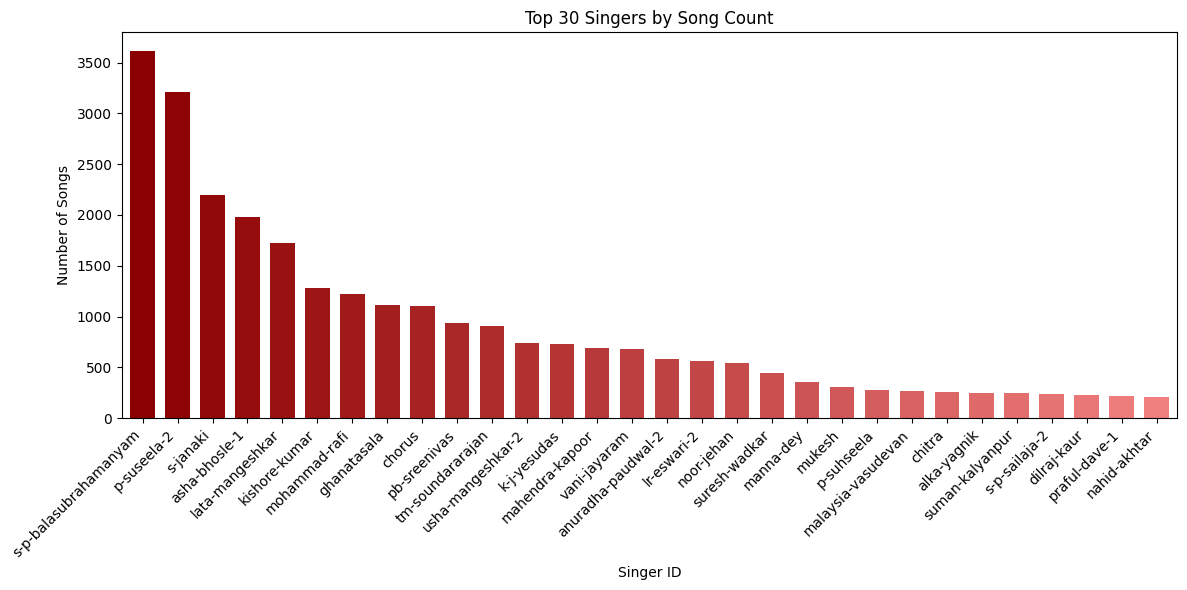

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Your existing code
singer_counts = df['singer_id'].str.split(',').explode().value_counts().head(30)

plt.figure(figsize=(12, 6))

# Define a custom red colormap
cmap_red = LinearSegmentedColormap.from_list("my_cmap", ["darkred", "lightcoral"])

# Generate colors based on the custom colormap
colors = cmap_red(np.linspace(0, 1, len(singer_counts)))

# Create the bar plot with gradient colors
ax = singer_counts.plot(kind='bar', color=colors, width=0.7)

# Customize the plot
plt.xlabel("Singer ID")
plt.ylabel("Number of Songs")
plt.title("Top 30 Singers by Song Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [79]:
import plotly.express as px
import pandas as pd

# Your existing code
singer_counts = df['singer_id'].str.split('|').explode().value_counts().head(30)
singer_counts_df = singer_counts.reset_index()  # Convert to DataFrame for Plotly
singer_counts_df.columns = ['singer_id', 'count']  # Rename columns

# Create the Plotly bar chart
fig = px.bar(
    singer_counts_df,
    x='singer_id',
    y='count',
    color='count',  # Use 'count' for color scale
    color_continuous_scale=['darkred','lightcoral'],  # Set the color scale
)

# Customize the layout
fig.update_layout(
    title="Top 30 Singers by Song Count",
    xaxis_title="Singer ID",
    yaxis_title="Number of Songs",
    xaxis_tickangle=-45,  # Rotate x-axis labels
    width=1200,  # Adjust width
    height=600  # Adjust height
)

fig.show()

In [83]:
import plotly.express as px
import pandas as pd

# Your existing code
language_counts = df['language'].value_counts().sort_values(ascending=False).head()
language_counts_df = language_counts.reset_index()
language_counts_df.columns = ['language', 'count']

# Create the Plotly donut chart
fig = px.pie(
    language_counts_df,
    values='count',
    names='language',
    hole=0.4,  # Create the hole for the donut
    color_discrete_sequence=['rgb(199, 73, 88)', 'indianred', 'firebrick', 'maroon', 'darkred']  # Custom color sequence
)

# Customize the layout
fig.update_layout(
    title="Top 5 Languages",
    width=600,
    height=600,
    legend_title="Language",
)
fig.update_traces(textinfo='percent+label')  # Show percentage and label on slices

fig.show()

In [85]:
import plotly.express as px
import pandas as pd
import colorsys

def adjust_lightness(rgb, factor):
    h, l, s = colorsys.rgb_to_hls(rgb[0]/255.0, rgb[1]/255.0, rgb[2]/255.0)
    l = max(min(l * factor, 1.0), 0.0)  # Clamp lightness to 0-1 range
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    return f'rgb({int(r*255)},{int(g*255)},{int(b*255)})'

# Your existing code
language_counts = df['language'].value_counts().sort_values(ascending=False).head()
language_counts_df = language_counts.reset_index()
language_counts_df.columns = ['language', 'count']

# Base RGB color
base_rgb = (199, 73, 88)

# Generate color sequence
color_sequence = [
    adjust_lightness(base_rgb, 1.5),  # Lighter shade 1
    adjust_lightness(base_rgb, 1.2),  # Lighter shade 2
    adjust_lightness(base_rgb, 1.0),  # Original color
    adjust_lightness(base_rgb, 0.8),  # Darker shade 1
    adjust_lightness(base_rgb, 0.6),  # Darker shade 2
]

# Create the Plotly donut chart
fig = px.pie(
    language_counts_df,
    values='count',
    names='language',
    hole=0.4,
    color_discrete_sequence=color_sequence
)

fig.update_layout(
    title="Top 5 Languages",
    width=600,
    height=600,
    legend_title="Language",
)
fig.update_traces(textinfo='percent+label')  # Show percentage and label on slices

fig.show()

In [91]:
# fig.write_image("donut_chart.png")  # Change file format as needed (e.g., .jpg, .svg, .pdf)

# # 2. Export as an HTML file
fig.write_html("donut_chart.html")

# 3. Export as a JSON file
fig.write_json("donut_chart.json")

In [89]:
!pip install kaleido

In [94]:
pd.read_csv('/content/datasets/Airbnb/airbnb_v2.csv')

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12800,12800,44697740,"Brown Dome House No. 3, full of healing",4.94,16,Aidan,161552316.0,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...","4 guests,8 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...",...,4288,South Korea,8,0,4,0,0,0,3 00 pm - 11 00 pm,11 00 am
12801,12801,29975283,Bubble Hotel Ubud with Bathtub under the Sky,4.67,6,Martha,118954227.0,"Gianyar, Indonesia","2 guests,1 bedroom,1 bed,Toilet with sink","Wifi,Free on-street parking,Air conditioning,G...",...,15200,Indonesia,0,1,2,1,1,0,3 00 pm - 10 00 pm,12 00 pm
12802,12802,32977697,Paradise Eco Hub,4.67,3,Silas,175214568.0,"Kabale, Uganda","2 guests,1 bedroom,2 beds,1 private bathroom","Wifi,Breakfast,Long-term stays allowed,Unavail...",...,9103,Uganda,1,2,2,0,1,0,After 3 00 pm,NaN
12803,12803,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,4.86,7,Cempaka,718423.0,"Gunung Sari, Nusa Tenggara Barat, Indonesia","8 guests,2 bedrooms,4 beds,2.5 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,42262,Indonesia,2,4,8,0,2,0,Flexible,12 00 pm
